<a href="https://colab.research.google.com/github/MohammadParsaTheFirst/My-HWs/blob/main/Machine%20Vision%20LAB/LAB2%20/LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 2
## MohammadParsa Dini
### 400101204


### Importing Nessecary Libraries

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("running on gpu")
else:
    device = torch.device("cpu")
    print("running on cpu")

running on gpu


In [ ]:
import torch

# Check the available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")
for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")


Available GPUs: 1
GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### (I) Part 1

 In the First section, we will import the data of ozone. Then, we will choose 80 percent of the data for training and the rest of them for testing.
 Then we will get the data and fit a linear regression model to the train data. At last, we will compute the MSe loss of train and test data.


In [ ]:
file_path = 'C:/Users/USER/Downloads/Lab 2 (1)/ozon.csv'
data = pd.read_csv(file_path)

data

,radiation,temperature,wind,ozone
0,190,67,7.4,41
1,118,72,8.0,36
2,149,74,12.6,12
3,313,62,11.5,18
4,299,65,8.6,23
...,...,...,...,...
106,20,63,16.6,14
107,193,70,6.9,30
108,191,75,14.3,14
109,131,76,8.0,18


In [ ]:
x = data.drop('ozone', axis=1)
y = data['ozone']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'shaep of x       : {x.shape}')
print(f'shaep of y       : {y.shape}')
print(f'shape of x_train : {x_train.shape} ')
print(f'shape of x_test  : {x_test.shape} ')
print(f'shape of y_train : {y_train.shape} ')
print(f'shape of y_test  : {y_test.shape} ')

shaep of x       : (111, 3)
shaep of y       : (111,)
shape of x_train : (88, 3) 
shape of x_test  : (23, 3) 
shape of y_train : (88,) 
shape of y_test  : (23,) 


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
coeffs , intercept = model.coef_, model.intercept_

print(f'coefficient of the linear regression model :: {coeffs}')
print(f'intercept of the linear regression model   :: {intercept}')

coefficient of the linear regression model :: [ 0.06339674  1.6229136  -3.45349018]
intercept of the linear regression model   :: -60.99239108927823


In [ ]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test_pred, y_test)

print(f'MSE error for train data :: {mse_train}')
print(f'MSE error for test data  :: {mse_test}')

MSE error for train data :: 481.62978844934446
MSE error for test data  :: 245.17289877643475


Text(0.5, 1.0, 'MSE of trained data with increasing variance from 0 up to 50')

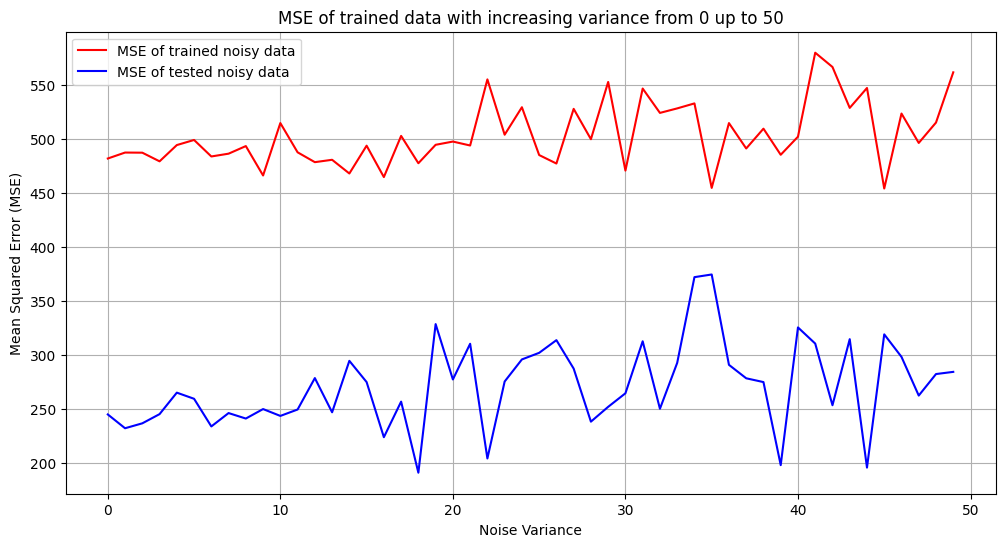

In [ ]:
vars = np.linspace(0, 50, 50)
mse_trains = []
mse_tests = []

for var in vars:
    noise = np.random.normal(0, np.sqrt(var), size=y.shape)
    y_noisy = y + noise
    x_train, x_test, y_train, y_test = train_test_split(x,y_noisy, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    mse_test = mean_squared_error(y_pred_test, y_test)
    mse_train = mean_squared_error(y_pred_train, y_train)
    mse_tests.append(mse_test)
    mse_trains.append(mse_train)

plt.figure(figsize=(12,6))
plt.plot(mse_trains, color='r')
plt.plot(mse_tests, color='b')
plt.legend(['MSE of trained noisy data', 'MSE of tested noisy data'])
plt.grid(True)
plt.xlabel('Noise Variance')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of trained data with increasing variance from 0 up to 50')


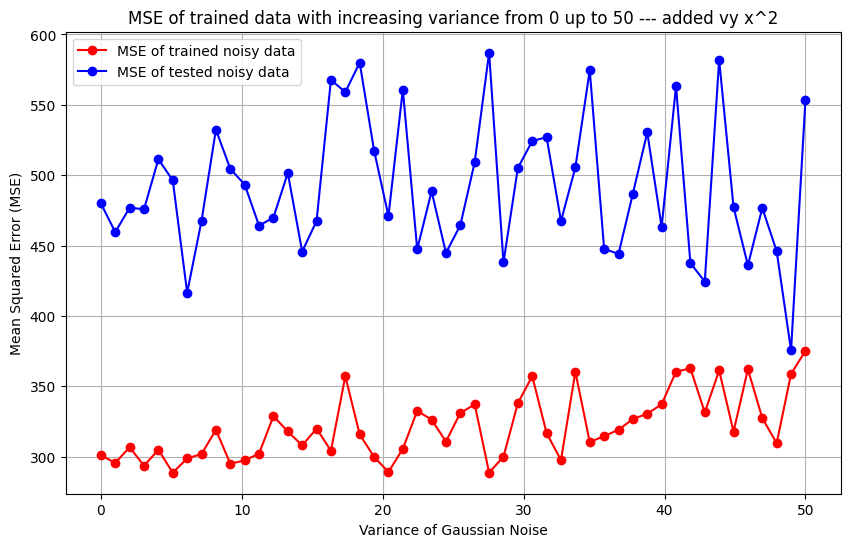

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

vars = np.linspace(0, 50, 50)
noise_variances = np.linspace(0, 80, 40)
mse_trains = []
mse_tests = []

for var in vars:
    noise = np.random.normal(0, np.sqrt(var), size=y.shape)
    y_noisy = y + noise

    # Add x^2 features to the matrix x
    x_with_features = np.hstack((x, x**2))

    x_train, x_test, y_train, y_test = train_test_split(x_with_features, y_noisy, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    mse_trains.append(mse_train)
    mse_tests.append(mse_test)

plt.figure(figsize=(10, 6))
plt.plot(vars, mse_trains, color='r', marker='o')
plt.plot(vars, mse_tests, color='b', marker='o')
plt.legend(['MSE of trained noisy data', 'MSE of tested noisy data'])
plt.grid(True)
plt.title('MSE of trained data with increasing variance from 0 up to 50 --- added vy x^2')
plt.xlabel('Variance of Gaussian Noise')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()


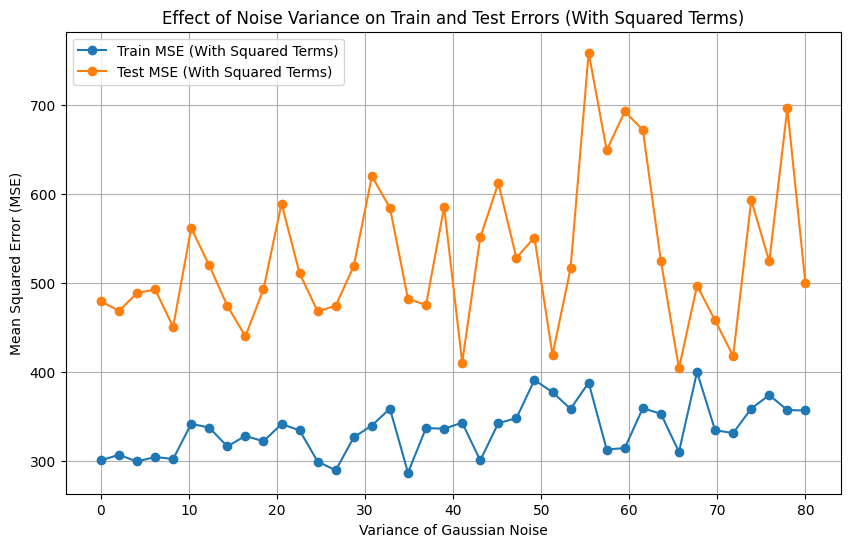

In [ ]:
# Adding X['radiation'] ** 2 and X['temperature'] ** 2 and X['wind'] ** 2 coefficients to the model

X = data.drop('ozone', axis=1)

X_extended = X.copy()
X_extended['radiation^2'] = X['radiation'] ** 2
X_extended['temperature^2'] = X['temperature'] ** 2
X_extended['wind^2'] = X['wind'] ** 2

train_errors = []
test_errors = []

for var in noise_variances:
    # Guassian noise
    noise = np.random.normal(0, np.sqrt(var), size=y.shape)
    y_noisy = y + noise

    X_train, X_test, y_train, y_test = train_test_split(X_extended, y_noisy, test_size=0.2, random_state=42)

    # Create and Train LR
    model = LinearRegression()
    model.fit(X_train, y_train)

    #  Predicting on Train/Test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #  MSE on Train/Test set
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

plt.figure(figsize=(10, 6))
plt.plot(noise_variances, train_errors, label='Train MSE (With Squared Terms)', marker='o')
plt.plot(noise_variances, test_errors, label='Test MSE (With Squared Terms)', marker='o')
plt.xlabel('Variance of Gaussian Noise')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Noise Variance on Train and Test Errors (With Squared Terms)')
plt.legend()
plt.grid(True)
plt.show()


### (II) Part 2:


In [ ]:
import os
import cv2
import numpy as np

file_path = "C:\\Users\\USER\\Downloads\\surprise videos\\surprise videos"
videos = []
labels = []

# List all directories in the file_path
video_dirs = os.listdir(file_path)

for video_dir in video_dirs:
    vid_path = os.path.join(file_path, video_dir)
    if os.path.isdir(vid_path):
        frames = os.listdir(vid_path)
        frames_len = len(frames)
        for i, frame in enumerate(frames):
            img_path = os.path.join(vid_path, frame)
            img = cv2.imread(img_path)
            if frames_len > 1:
                label = i / (frames_len - 1)
            else:
                label = 0
            videos.append(img.flatten())
            labels.append(label)

x = np.array(videos)
y = np.array(labels)
#x_flattened = x.reshape((x.shape[0], -1))

print(f'shape of x               : {x.shape}')
print(f'shape of y               : {y.shape}')
#print(f'flattened image size     : {x_flattened.shape}')


shape of x               : (633, 3240000)
shape of y               : (633,)


In [ ]:
import os
import cv2

X = []
y = []

data_dir =  "C:\\Users\\USER\\Downloads\\surprise videos\\surprise videos"

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        images = sorted(os.listdir(folder_path))
        num_images = len(images)
        # print(num_images)

        for i, img_name in enumerate(images):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                img_flattened = img.flatten()  # Vectorizing the X
                X.append(img_flattened)

                # Linear lable from 0 to 1
                label = i / (num_images - 1)
                y.append(label)
            else:
                print(f"Warning: Unable to load image {img_path}")

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating and Fitting LR
model = LinearRegression()
model.fit(X_train, y_train)

#  Predicting on Train/Test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#  MSE on Train/Test set
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 3.0452411246751654e-28
Test MSE: 0.004782476166676027


This shows the linear model is not quite a good idea since the model with this huge dimension would be quite complex, therefore it will lead to overfitting. This had happened in our case since the  test error is much less than the train error.

In [ ]:
print(y_test.shape)
print(X_test.shape) # 1200*900

(254,)
(254, 1080000)


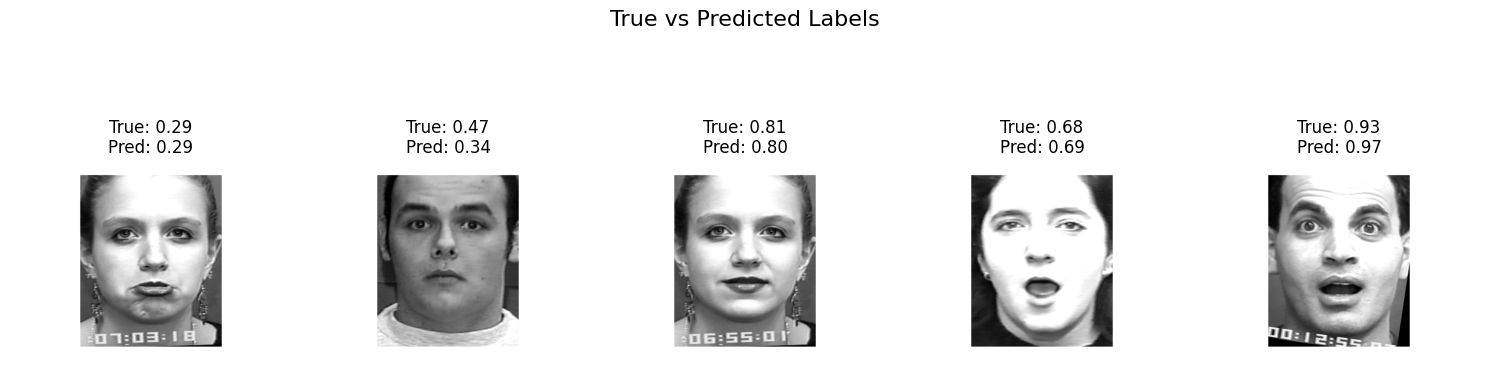

In [ ]:

# Plot 5 test images with their true and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle('True vs Predicted Labels', fontsize=16)

W = 1200
H = 900
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(H, W), cmap='gray')
    ax.set_title(f"True: {y_test[i]:.2f}\nPred: {y_test_pred[i]:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()

As you can see, our model works pretty well, since you can see that the prediction of labels(time- order of the sequence) is quite accurate.

In [ ]:
import math
# defining the mask

def apply_mask(image):
    height, width = image.shape
    radius = math.floor(min(height, width) * 0.4)
    center = (width // 2, height // 2)
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.circle(mask, center, radius, 255, -1)


    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image


In [ ]:
X= []
y = []
masked =[]

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        images = sorted(os.listdir(folder_path))  # Sorting
        num_images = len(images)

        for i, img_name in enumerate(images):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # GRayscale

            if img is not None:
                masked_img = apply_mask(img)  # Applyig mask

                X.append(masked_img.flatten() )
                #X.append(masked_img)
                masked.append(masked_img)
                # Linear labels from 0 to 1
                label = i / (num_images - 1)
                y.append(label)
            else:
                print(f"Warning: Unable to load image {img_path}")

In [ ]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#  Creating and fitting LR
model = LinearRegression()
model.fit(X_train, y_train)

#  Predicting on Train/Test set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#  MSE on Train/Test set
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 2.5785897016743194e-28
Test MSE: 0.004866691545540932


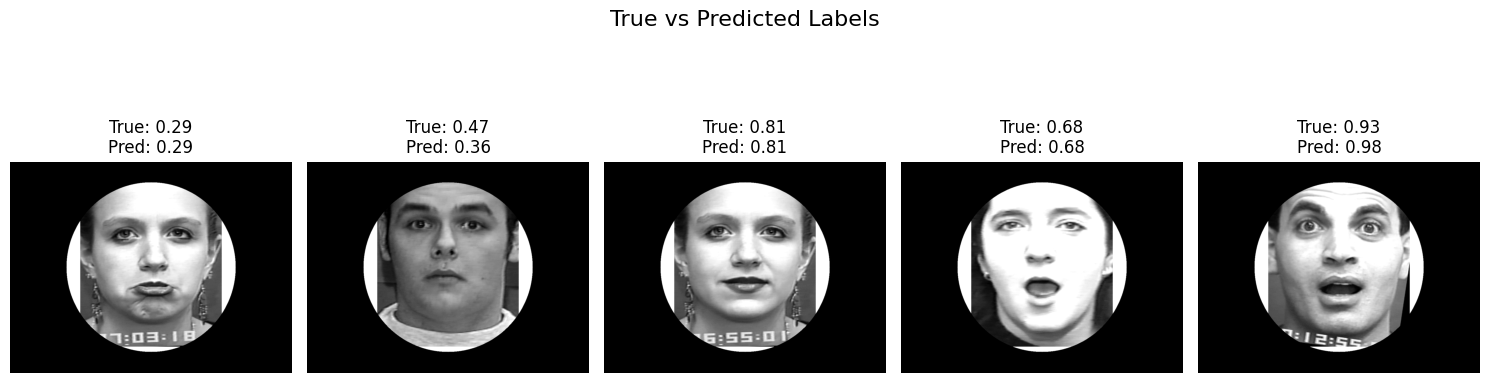

In [ ]:

# Plot 5 test images with their true and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle('True vs Predicted Labels', fontsize=16)

W = 1200
H = 900
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(H, W), cmap='gray')
    ax.set_title(f"True: {y_test[i]:.2f}\nPred: {y_test_pred[i]:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()

As you can see, our model works pretty well, since you can see that the prediction of labels(time- order of the sequence) is quite accurate.

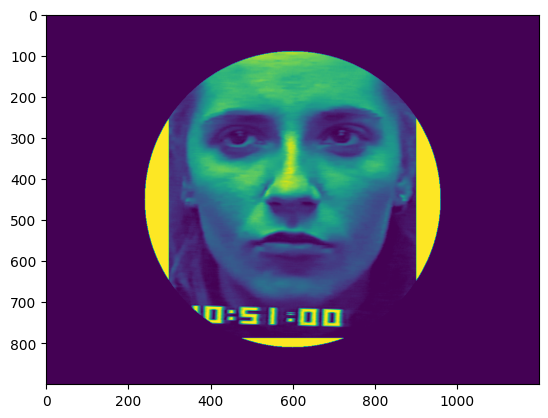

In [ ]:
plt.imshow(masked[30])
#shwoing that what  images looklike after getting masked

In [ ]:
def perform_pca(images, num_components):
    reshaped_images = [img.flatten() for img in images]
    data_matrix = np.array(reshaped_images)
    mean_face = np.mean(data_matrix, axis=0)
    centered_data = data_matrix - mean_face

    A = np.array(centered_data).T  # Transpose to get covariance matrix
    AtA = np.dot(A.T, A)  # Covariance matrix
    eigvals, eigvecs_v = np.linalg.eig(AtA)

    sorted_indices = np.argsort(eigvals)[::-1]  # Sort eigenvalues
    top_eigvecs_v = eigvecs_v[:, sorted_indices[:num_components]]  # Top components

    top_eigvecs_u = np.dot(A, top_eigvecs_v)  # Actual eigenfaces
    for i in range(num_components):
        top_eigvecs_u[:, i] /= np.linalg.norm(top_eigvecs_u[:, i])  # Normalize

    return mean_face, top_eigvecs_u

# DR of data
def project_to_pca_space(images, mean_face, eigenfaces):
    projected_data = []
    for img in images:
        img_vector = img.flatten() - mean_face
        weights = np.dot(eigenfaces.T, img_vector)  # Projections onto eigenfaces
        projected_data.append(weights)
    return np.array(projected_data)

In [ ]:
# Apply PCA
num_components = 10  # Main coefficients
mean_face, eigenfaces = perform_pca(X_train, num_components)

# DR
X_train_pca = project_to_pca_space(X_train, mean_face, eigenfaces)
X_test_pca = project_to_pca_space(X_test, mean_face, eigenfaces)

# Fitting model
model = LinearRegression()
model.fit(X_train_pca, y_train)

#  Predicting on Train/Test set
y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE after PCA:", train_mse)
print("Test MSE after PCA:", test_mse)

Train MSE after PCA: 0.06468476302516789
Test MSE after PCA: 0.07205313167130775


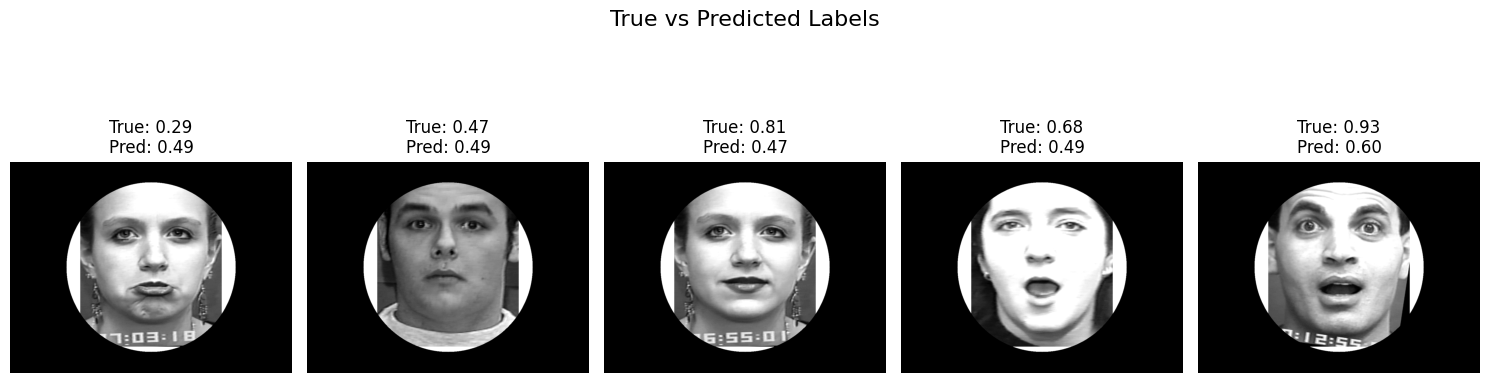

In [ ]:

# Plot 5 test images with their true and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
fig.suptitle('True vs Predicted Labels', fontsize=16)

W = 1200
H = 900
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(H, W), cmap='gray')
    ax.set_title(f"True: {y_test[i]:.2f}\nPred: {y_test_pred[i]:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()

This time the model is less complex and has less train and test errors, but when we chose some images, we observed that applying pca led to more inaccuracy.

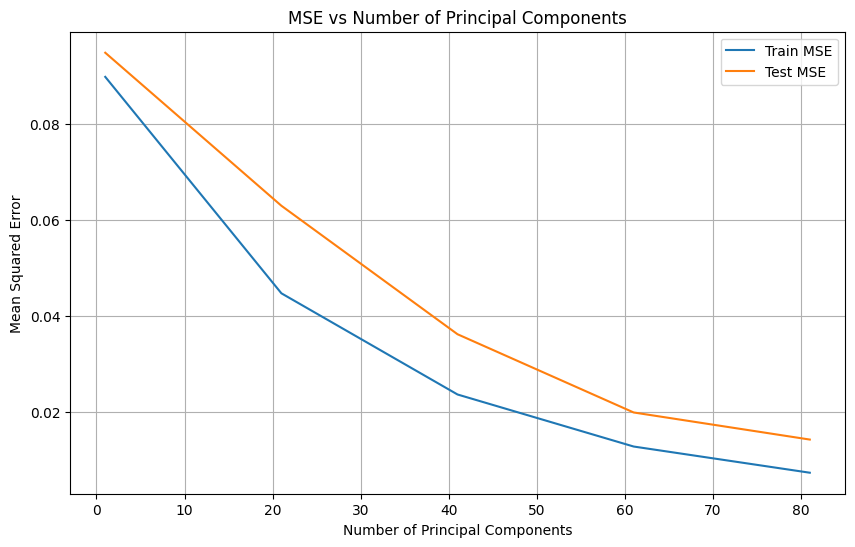

In [ ]:

train_mse_list = []
test_mse_list = []

# num_components_range = range(1, 46, 10)
num_components_range = range(1, 101 , 20)

for num_components in num_components_range:

    mean_face, eigenfaces = perform_pca(X_train, num_components)


    X_train_pca = project_to_pca_space(X_train, mean_face, eigenfaces)
    X_test_pca = project_to_pca_space(X_test, mean_face, eigenfaces)


    model = LinearRegression()
    model.fit(X_train_pca, y_train)

    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

plt.figure(figsize=(10, 6))
plt.plot(num_components_range, train_mse_list, label='Train MSE')
plt.plot(num_components_range, test_mse_list, label='Test MSE')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Number of Principal Components')
plt.legend()
plt.grid(True)
plt.show()


As we can see, by applying more and more principal components, we will get more accurate models after training.